In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("../data/heart_disease_clean.csv")
X = df.drop(columns=["target"])
y = df["target"]


X = pd.get_dummies(X, drop_first=True)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA().fit(X_scaled)
explained = np.cumsum(pca.explained_variance_ratio_)

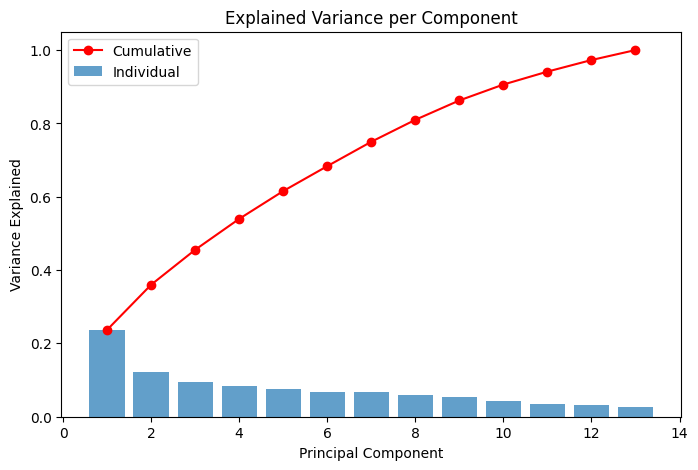

In [10]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), 
        pca.explained_variance_ratio_, alpha=0.7, label="Individual")
plt.plot(range(1, len(explained)+1), explained, marker="o", color="red", label="Cumulative")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Explained Variance per Component")
plt.legend()
plt.show()


In [7]:
k = int(np.argmax(explained >= 0.95)) + 1
pca_k = PCA(n_components=k).fit(X_scaled)
X_pca = pca_k.transform(X_scaled)

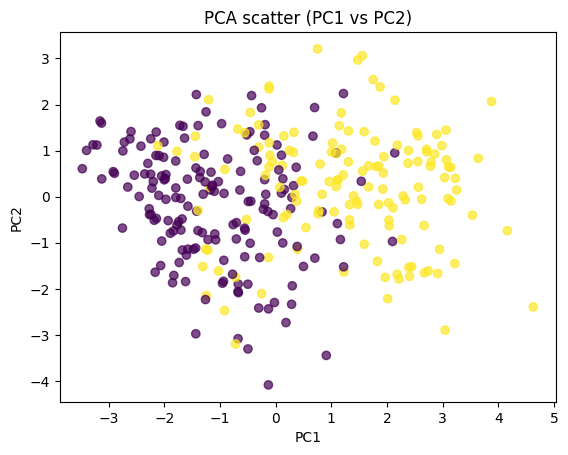

In [8]:
if k >= 2:
    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.7)
    plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA scatter (PC1 vs PC2)")
    plt.show()


In [11]:
pd.DataFrame(X_pca).to_csv("../data/heart_pca.csv", index=False)


In [12]:
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(k)])
pca_df["target"] = y.values
pca_df.to_csv("../data/heart_pca.csv", index=False)
